# importing packages

In [1]:
import pandas as pd
import numpy as np
import os

# directory for getting the original feature list

In [2]:
#find current directory
#location of original data
starting_directory = os.getcwd()

new_dirrectory = "C:/Users/maega/Documents/3000 PhD/3300_BEAT Labs/Projects/Cardiac-Amyloidosis-Multiple-Myeloma/012 Processed Data/PtLabsFiltered_2024-06-26_v1"
os.chdir(new_dirrectory)
#change working directory to where the data is stored

#create file naming system for data outputs

### importing the data

In [3]:
#import the original feature list
lab_list_import = pd.read_excel("ListPts-W-WO-Lab-20240626_v2.xlsx", sheet_name = "lab list pts without", header = [0])


### collecting the lab names and the number of patients as seperate series

In [4]:
lab_list = lab_list_import.iloc[:,0] #list of the raw lab result names without transformations
lab_list_numbpts = lab_list_import.iloc[:,2] #for use later in assessing the completeness of the data

### additional features describing patients which arean't labs in their untransformed states
no descriptive statistics or fits

In [5]:
# #additional starting features
# additional_features = pd.Series(["Amyloid Status", "Dx", "Sex", 'Age', 'Survival (in months)',
#                        "ChemoTx", "ChemoTx Number", "ImmunoTx", "ImmunoTx Number", "HemeTx", "HemeTx Number", 
#                        "RadTx", "RadTx Number", "OtherTx", "OtherTx Number", 'time from diagnosis to note (months)', 
#                        'ECOG Performance Status', 'Karnofsky Performance Status', 'Clinical Impression of Disease', 
#                        "1st_EF(avg%)", "1st_Diastolic grade", "1st_BSA", "1st_PWT(cm)", "1st_IVS(cm)", "1st_lvid(cm)", 
#                        "1st_LA_dimension (cm)","1st_Lvmass", "1st_LVMI","1st_RWT", "1st_LA_grade", "1st_mv_grade", 
#                        "1st_AV_grade", "1st_rvsp(mmHg)", "1st_LVH", "1stGLS", "1stGLSreported", "use1stGLS", 
#                        "1st_outerLS", "1st_midLS", "1st_innerLS", "1st_echoOSH"])

In [6]:
#additional starting features
additional_features = pd.Series(["Amyloid Status", "Dx", "Sex", 'Age', 'Survival (in months)',
                       "ChemoTx", "ImmunoTx", "HemeTx", 
                       "RadTx", "OtherTx", 'time from diagnosis to note (months)', 
                       'ECOG Performance Status', 'Karnofsky Performance Status', 'Clinical Impression of Disease', 
                       "1st_EF(avg%)", "1st_Diastolic grade", "1st_BSA", "1st_PWT(cm)", "1st_IVS(cm)", "1st_lvid(cm)", 
                       "1st_LA_dimension (cm)","1st_Lvmass", "1st_LVMI","1st_RWT", "1st_LA_grade", "1st_mv_grade", 
                       "1st_AV_grade", "1st_rvsp(mmHg)", "1st_LVH", "1stGLS", "1stGLSreported", "use1stGLS", 
                       "1st_outerLS", "1st_midLS", "1st_innerLS", "1st_echoOSH", "time from diagnosis to first echo (months)"])
#here the "ChemoTx Number" and similar original data were removed as they will be picked up as transformations

In [7]:
full_og_featureList = pd.concat([lab_list, additional_features], axis = 0) #adding the two lists of features together
full_og_featureList.reset_index()

,index,0
0,0,Creatinine Result(mg/dL)
1,1,Potassium Result(mmol/L)
2,2,total CO2 Result
3,3,Chloride Result(mmol/L)
4,4,Calcium Result(mg/dL)
...,...,...
188,32,1st_outerLS
189,33,1st_midLS
190,34,1st_innerLS
191,35,1st_echoOSH


In [8]:
#get the list of best features from the SVM

# get the list of best features from the SVM models 

In [9]:
#find current directory
#location of original data
starting_directory = os.getcwd()

new_dirrectory = 'C:/Users/maega/UFL Dropbox/Maegan Cremer/research-share/Maegan/Projects/Cardiac-Amyloidosis-Multiple-Myeloma/013 Analyzed Data outputs'
# "C:/Users/mcremer/UFL Dropbox/Maegan Cremer/research-share/Maegan/Projects/Cardiac-Amyloidosis-Multiple-Myeloma/013 Analyzed Data outputs"
#C:/Users/maega/UFL Dropbox/Maegan Cremer/research-share/Maegan
os.chdir(new_dirrectory)
#change working directory to where the data is stored


### importing the list of best features by model and finding the unique list of features + transformations

In [10]:
#importing the dataframe describing features selected for each model
features_across_models = pd.read_excel("2024-07-29_FeatureListFromSVM.xlsx", sheet_name = "feature list", header = [0,1,2])
features_across_models.drop(columns=[('data in', 'feature reduction', 'weighting of importance-contribution')],axis =1, inplace = True)
# features_across_top38 = pd.read_excel("2024-07-29_FeatureListFromSVM.xlsx", sheet_name = "feature list top 38", header = [0,1,2])
# features_across_allLabs = pd.read_excel("2024-07-29_FeatureListFromSVM.xlsx", sheet_name = "feature list all labs", header = [0,1,2])

#create 1D list of features across all models
features_1D = features_across_models.to_numpy().flatten()

features_1D_clean = features_1D[~pd.isna(features_1D)]
#create list of unique features across all models
features_1D_unique = pd.unique(features_1D_clean)

### Describing the frequency of features across all models

In [11]:
#characterize the frequency of the transformed feature in the list of features selected by SVM
from collections import Counter
feature_counts = Counter(features_1D_clean)
feature_counts_dict = dict(feature_counts)


# Comparing the original data types to the list of features
makes a dictionary where the keys are the original data types represented among the features\
values are the best features represented across all models

In [12]:
#find the original list of labs within the transformed list
#filters the unique list of labs

dict_og_to_transformed = {}
dict_og_to_trimmed_transformed = {} #for use in multi-indexing
# list_transformedFeatures = []
for og_feature in full_og_featureList:
    list_transformedFeatures = []
    list_transformations = []
    for feature_transformed in features_1D_unique:
        if og_feature in feature_transformed:
            # list_transformedFeatures.append(feature_transformed)
            #trimming slicing the original feature off and adding the transformed section to a list
            start_position_for_slice = len(og_feature) + 1 #removes the space when slicing
            name_transformation = feature_transformed[start_position_for_slice:] #slices the length of the orginal feature off the string
            #check to see if the section trimmed from the feature exactly matches the og_feature
            trimmed_head_string = feature_transformed[:len(og_feature)]
            if trimmed_head_string == og_feature: #ensures that the feature identified isn't a variation such as PCT myelocyte vs myelocyte
                if name_transformation != "eported": #a little weirdness from one of the echo measures
                    list_transformations.append(name_transformation) #adds the transformation to the list for that feature
                    list_transformedFeatures.append(feature_transformed) #adds the og+transform to the og_to_transform
    if len(list_transformedFeatures) != 0:
        dict_og_to_transformed[og_feature] = list_transformedFeatures
        dict_og_to_trimmed_transformed[og_feature] = list_transformations

In [13]:
#creating multi-indexed pattern for the table of features used in the SVM models 

#collecting the two arrays for indexing from the dictionary
level_1 = [] #keys
level_2 = [] #values, or the transformations

#to make the key list the same length as the value list such that the pairings can be made... 
for key in list(dict_og_to_trimmed_transformed.keys()):
    for transformation in list(dict_og_to_trimmed_transformed[key]):
        level_1.append(key)
        level_2.append(transformation)

level_1_2 = [level_1, level_2]
multiIndex_tuple_features = list(zip(*level_1_2))

### create binary dataframe of features per model with multiIndex

In [14]:
#set the unique features to the row index 
row_dictionary = dict_og_to_transformed

#set the columns to the headers from earlier, the models
column_index = features_across_models.columns

dict_binary = {}
#pull the features from a column and compare them to 
for column in column_index: 
    column_data_binary = []
    column_data = features_across_models[column]
    for key in list(row_dictionary.keys()):
        for feature in list(row_dictionary[key]):
            if feature in column_data.values:
                column_data_binary.extend([1])
            else:
                column_data_binary.extend([0])
    dict_binary[column] = column_data_binary       



multiIndex_features = pd.MultiIndex.from_tuples(multiIndex_tuple_features, names=["original data", "transformation"])
df_binary = pd.DataFrame.from_dict(dict_binary, orient = "columns")

df_binary.index = multiIndex_features
# df.binary.drop(columns=[('data in', 'feature reduction', 'weighting of importance-contribution')],axis =1, inplace = True)

In [16]:
with pd.ExcelWriter("featureComp_2024-08_01_v1.xlsx", mode = 'a', if_sheet_exists = 'overlay') as writer:
    df_binary.to_excel(writer, sheet_name = "all models binary", index = True)

FileNotFoundError: [Errno 2] No such file or directory: 'featureComp_2024-08_01_v1.xlsx'

### frequency of original feature in a model 

In [ ]:
#correlation matrix for the original data selected by the models 

#take the binary of the data, flatten such that the original data has a value equal to the number of transforms performed on it

#set data frame
df = df_binary
dict_levels = dict_og_to_trimmed_transformed #setting indexing dictionary

dict_orig_data_frequency_in_model = {} #keys are the models, values are the frequencies of original data in the selected features

for column in list(df.columns):
    column_data = []
    # row_names = []
    for original_data in list(dict_levels.keys()):
        feature_count = df[column].loc[original_data].sum()
        column_data.append(feature_count)
        # row_names.append(original_data)
    dict_orig_data_frequency_in_model[column] = column_data

#convert to dataframe
df_orig_data_frequency_in_model = pd.DataFrame.from_dict(dict_orig_data_frequency_in_model, orient = "columns")
df_orig_data_frequency_in_model.index = list(dict_levels.keys())
# df_orig_data_frequency_in_model.drop(columns=[('data in', 'feature reduction', 'weighting of importance-contribution')],axis =1, inplace = True)

with pd.ExcelWriter("featureComp_2024-08_01_v1.xlsx", mode = 'a', if_sheet_exists = 'overlay') as writer:
    df_featureFrequency.to_excel(writer, sheet_name = "all models orig features frq", index = True)


# organizing the frequency information to a multiIndexed dataframe


In [ ]:
#set the unique features to the row index 
row_dictionary = dict_og_to_transformed

dict_frequencyList = {}
for key in list(row_dictionary.keys()):
    for feature in list(row_dictionary[key]):
        dict_frequencyList[feature] = feature_counts_dict[feature] #reorders the dictionary?


multiIndex_features = pd.MultiIndex.from_tuples(multiIndex_tuple_features, names=["original data", "transformation"])
df_featureFrequency = pd.DataFrame.from_dict(dict_frequencyList, orient = "index")

df_featureFrequency.index = multiIndex_features 

In [ ]:
with pd.ExcelWriter("featureComp_2024-08_01_v1.xlsx", mode = 'a', if_sheet_exists = 'overlay') as writer:
    df_featureFrequency.to_excel(writer, sheet_name = "all models feature frequency", index = True)

In [ ]:
# #figure out where the duplicates are

# #  = [' '.join(map(str, col)).strip() for col in dict_og_to_trimmed_transformed]
# test_compress_1 =[group + ' ' + transform for group in list(dict_og_to_trimmed_transformed.keys()) 
#                   for transform in list(dict_og_to_trimmed_transformed[group])]



# visualizations

In [ ]:
current_dir = os.getcwd()
new_dirrectory = os.chdir('../')
print(os.getcwd())

C:\Users\maega\UFL Dropbox\Maegan Cremer\research-share\Maegan\Projects\Cardiac-Amyloidosis-Multiple-Myeloma


In [ ]:
#first, get the completeness of the different labs
lab_list_import = pd.read_excel("012 Processed Data\PtLabsFiltered_2024-06-26_v1\ListPts-W-WO-Lab-20240626_v2.xlsx", sheet_name = "lab list pts without", header = [0])
lab_list = lab_list_import.iloc[:,0]
lab_list_import.index = lab_list_import.iloc[:,0]
lab_list_dict = lab_list_import.T.to_dict() #nested dictionary where there is a row "Number of Patients with this lab"
new_dirrectory= current_dir
os.chdir(new_dirrectory)

In [ ]:
df_lab_list_numb_pts = lab_list_import.iloc[:,[2]]
df_lab_list_numb_pts.index = lab_list_import.iloc[:,[0]]

## Correlation matrix for features across different models

<Axes: xlabel='original data-transformation', ylabel='original data-transformation'>

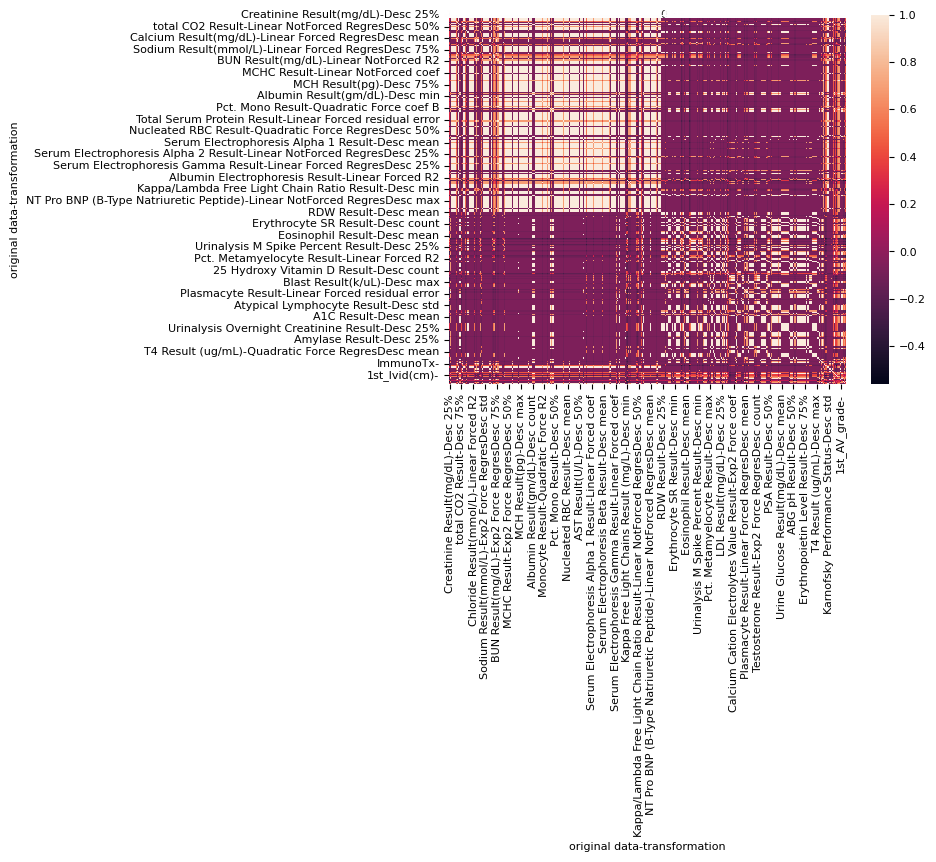

In [ ]:
#correlation matrix for raw features
import seaborn as sns
corr = df_binary.T.corr()

allFeatures_heatmap = sns.heatmap(corr, annot = True)
allFeatures_heatmap.savefig('allFeatures_allmodels_heatmap_20240801_v1.tif')

In [ ]:
# #correlation matrix for the original data selected by the models 

# #take the binary of the data, flatten such that the original data has a value equal to the number of transforms performed on it

# #set data frame
# df = df_binary
# dict_levels = dict_og_to_trimmed_transformed #setting indexing dictionary

# dict_orig_data_frequency_in_model = {} #keys are the models, values are the frequencies of original data in the selected features

# for column in list(df.columns):
#     column_data = []
#     # row_names = []
#     for original_data in list(dict_levels.keys()):
#         feature_count = df[column].loc[original_data].sum()
#         column_data.append(feature_count)
#         # row_names.append(original_data)
#     dict_orig_data_frequency_in_model[column] = column_data

# #convert to dataframe
# df_orig_data_frequency_in_model = pd.DataFrame.from_dict(dict_orig_data_frequency_in_model, orient = "columns")
# df_orig_data_frequency_in_model.index = list(dict_levels.keys())
# # df_orig_data_frequency_in_model.drop(columns=[('data in', 'feature reduction', 'weighting of importance-contribution')],axis =1, inplace = True)

# with pd.ExcelWriter("featureComparison_2024-08_01_v1.xlsx", mode = 'a', if_sheet_exists = 'overlay') as writer:
#     df_featureFrequency.to_excel(writer, sheet_name = "all models orig features frq", index = True)


<Axes: >

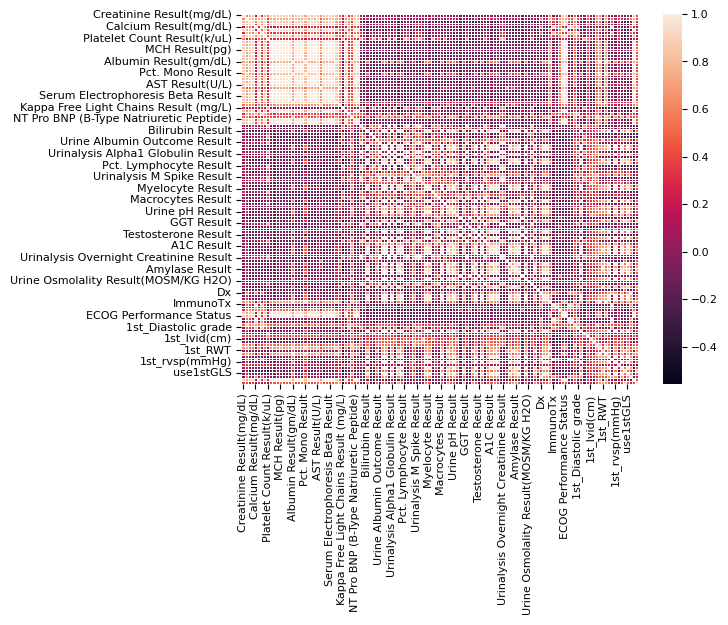

In [ ]:
corr = df_orig_data_frequency_in_model.T.corr()

orig_features_heatmap= sns.heatmap(corr, linewidths=0.5)
orig_features_heatmap.savefig('origFeatures_allmodels_heatmap_20240801_v1.tif')

[Text(0.5, 1.0, 'Total Numb Labs Collected')]

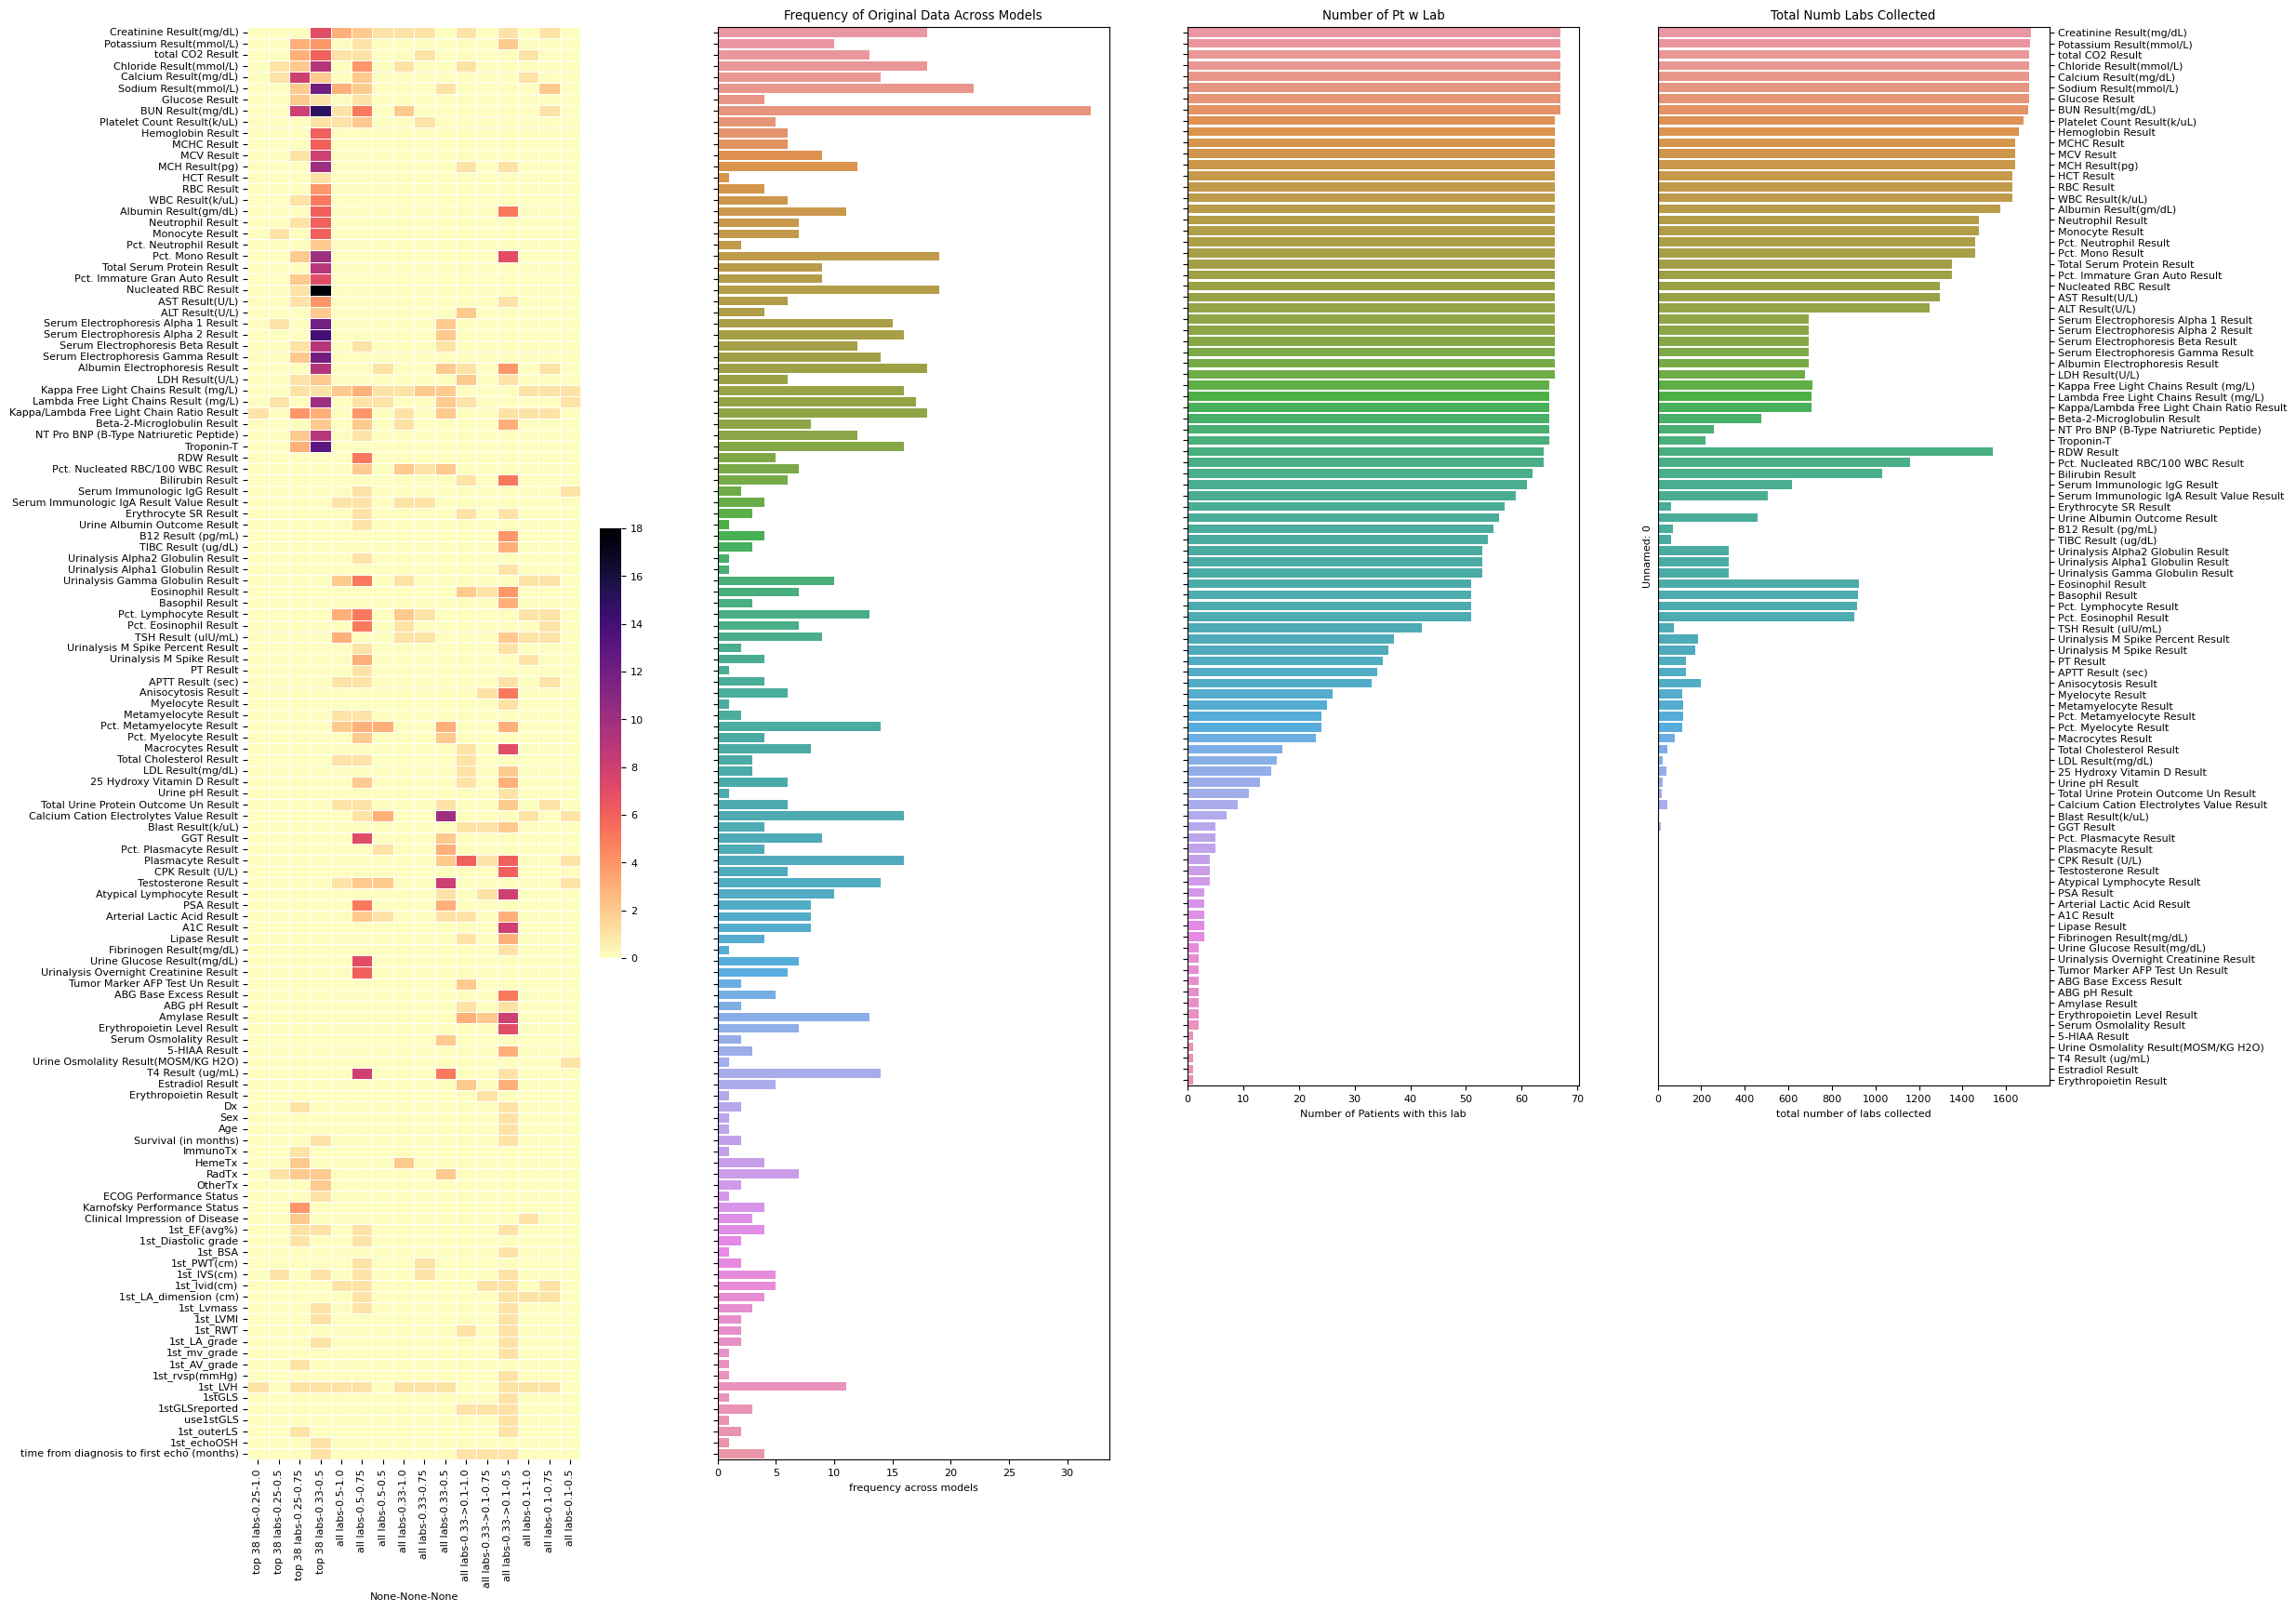

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams.update({'font.size': 8})
# fig, ax = plt.subplots(figsize=(10, 20))
fig = plt.figure(figsize = (25,20))

cmap = mpl.cm.magma_r
# bounds = [0, 1, 2, 3, 4, 6, 8, 10, 12, 18]
# norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

ax1 = plt.subplot2grid((4,4), (0,0), rowspan = 4)
ax1 = sns.heatmap(df_orig_data_frequency_in_model, yticklabels=list(df_orig_data_frequency_in_model.index), cmap= cmap,
                linewidths= 0.5, 
                # cbar=False
                cbar_kws={'location': 'right', 'fraction': 0.1, 'shrink': 0.3}
                )

# fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
#              ax=ax1, orientation='vertical', shrink = 0.3)

#create a fixed value for 0 on the plt

#plot frequency of the original data type across models
ax4 = plt.subplot2grid((4,4), (0,1), rowspan = 4)
frequency_origData_allModels = df_orig_data_frequency_in_model.sum(axis=1)
frequency_origData_allModels =frequency_origData_allModels.to_frame()
frequency_origData_allModels.insert(0, "original data", frequency_origData_allModels.index)
frequency_origData_allModels.columns = ["original data", "frequency across models"]
ax4 = sns.barplot(frequency_origData_allModels, y = "original data"  , x = "frequency across models")
ax4.set(title = "Frequency of Original Data Across Models")
ax4.set(ylabel=None)
ax4.set(yticklabels=[])

#add another subplot that shows the completeness of data for only the labs shown
ax2 = plt.subplot2grid((4,4), (0,2), rowspan = 3)

#filter df_lab_list_numb_pts to be only the labs graphed 
new_list = []
lab_list = lab_list_import.iloc[:,0]
lab_list_import.index = lab_list_import.iloc[:,0]
# print(lab_list.values.tolist())
for item in list(dict_og_to_trimmed_transformed.keys()):
    # print(item)
    for lab in lab_list:
        if item == lab:
            # print(item + " True")
            new_list.append(item)

masked_df_lab_numb_ptNumber = lab_list_import.loc[new_list]
df_labNumb_ptNumb_filtered_subplots= masked_df_lab_numb_ptNumber.iloc[:,[0,1,2]]
# ax2 = df_labNumb_ptNumb_filtered_subplots.plot.bar(subplots=True)
ax2 = sns.barplot(df_labNumb_ptNumb_filtered_subplots , y = "Unnamed: 0", x = "Number of Patients with this lab")
# startIndex = len(ax1.get_yticks())-len(new_list)
# ax2.set_yticks(ax1.get_yticks()[startIndex:])
ax2.set(ylabel=None)
ax2.set(yticklabels=[])
ax2.set(title= "Number of Pt w Lab")
# ax2.yaxis.set_label_position("right")
# startIndex = len(ax1.get_yticks())-len(new_list)
# ax2.set_yticks(ax1.get_yticks()[startIndex:])

ax3 = plt.subplot2grid((4,4), (0,3), rowspan = 3)
ax3 = sns.barplot(df_labNumb_ptNumb_filtered_subplots , y = "Unnamed: 0", x = "total number of labs collected")
ax3.yaxis.tick_right()
ax3.set(title="Total Numb Labs Collected")


# fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(0, 18), cmap='magma'),
#              ax=ax1, orientation='vertical', label='a colorbar label')


# cmap = mpl.cm.viridis_r
# bounds = [0, 1, 2, 3, 4, 6, 8, 10, 12, 18]
# norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
#              ax=ax1, orientation='vertical', shrink = 0.3)
fig.savefig("allModels_origFeatures_composit.tif")

[Text(0, 0, 'Creatinine Result(mg/dL)'),
 Text(1, 0, 'Potassium Result(mmol/L)'),
 Text(2, 0, 'total CO2 Result'),
 Text(3, 0, 'Chloride Result(mmol/L)'),
 Text(4, 0, 'Calcium Result(mg/dL)'),
 Text(5, 0, 'Sodium Result(mmol/L)'),
 Text(6, 0, 'Glucose Result'),
 Text(7, 0, 'BUN Result(mg/dL)'),
 Text(8, 0, 'Platelet Count Result(k/uL)'),
 Text(9, 0, 'Hemoglobin Result'),
 Text(10, 0, 'MCHC Result'),
 Text(11, 0, 'MCV Result'),
 Text(12, 0, 'MCH Result(pg)'),
 Text(13, 0, 'HCT Result'),
 Text(14, 0, 'RBC Result'),
 Text(15, 0, 'WBC Result(k/uL)'),
 Text(16, 0, 'Albumin Result(gm/dL)'),
 Text(17, 0, 'Neutrophil Result'),
 Text(18, 0, 'Monocyte Result'),
 Text(19, 0, 'Pct. Neutrophil Result'),
 Text(20, 0, 'Pct. Mono Result'),
 Text(21, 0, 'Total Serum Protein Result'),
 Text(22, 0, 'Pct. Immature Gran Auto Result'),
 Text(23, 0, 'Nucleated RBC Result'),
 Text(24, 0, 'AST Result(U/L)'),
 Text(25, 0, 'ALT Result(U/L)'),
 Text(26, 0, 'Serum Electrophoresis Alpha 1 Result'),
 Text(27, 0, 'Se

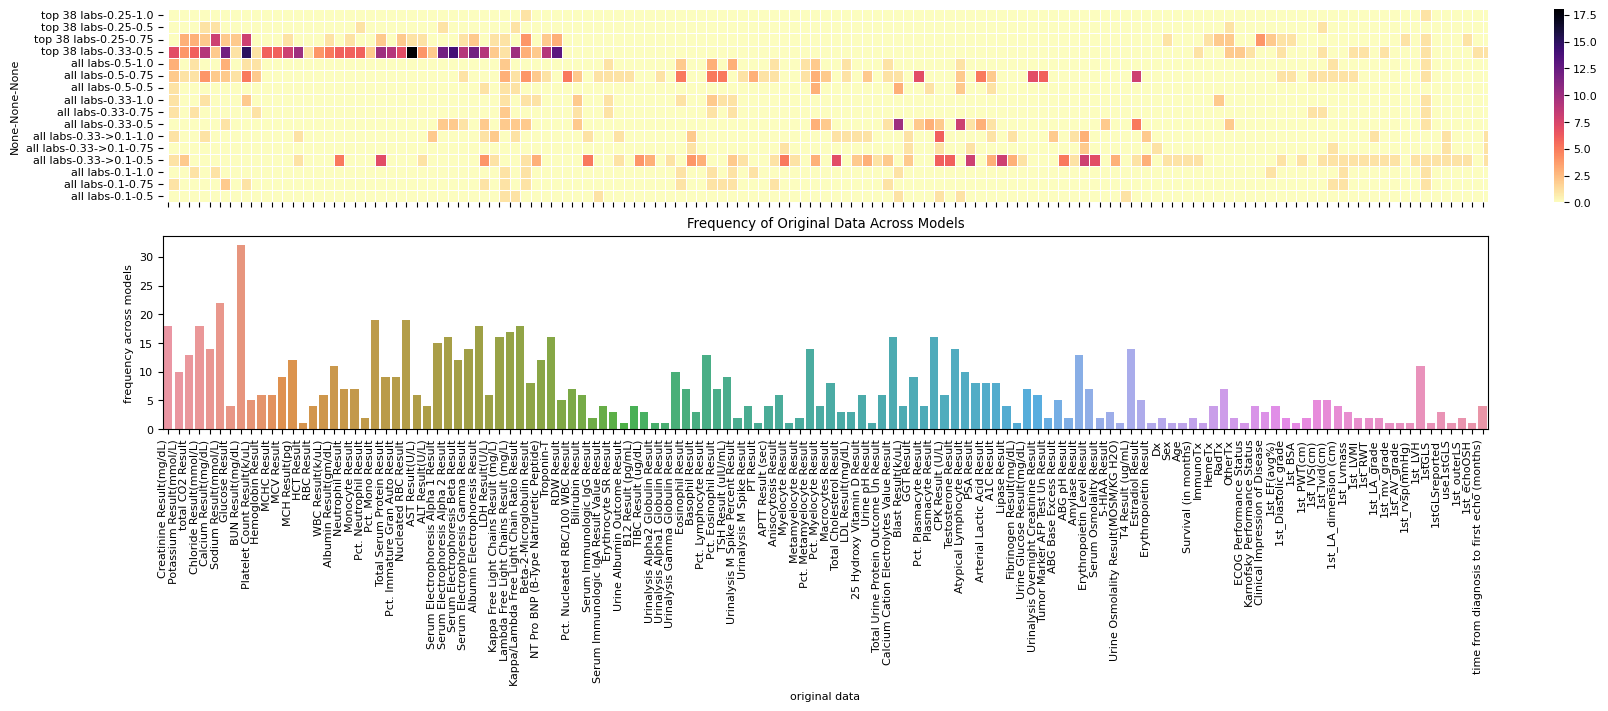

In [ ]:
plt.rcParams.update({'font.size': 8})
fig, ax = plt.subplots(2,1, figsize=(16, 7), sharex = True, layout = 'constrained')
heatmap = sns.heatmap(df_orig_data_frequency_in_model.T, xticklabels=list(df_orig_data_frequency_in_model.index), cmap= cmap,
                linewidths= 0.5, cbar= True, ax =ax[0])

ax[0].set(xlabel = None)
ax[0].set(xticklabels=[])

#create a fixed value for 0 on the plt

#plot frequency of the original data type across models

frequency_origData_allModels = df_orig_data_frequency_in_model.sum(axis=1)
frequency_origData_allModels =frequency_origData_allModels.to_frame()
frequency_origData_allModels.insert(0, "original data", frequency_origData_allModels.index)
frequency_origData_allModels.columns = ["original data", "frequency across models"]
frqplot = sns.barplot(frequency_origData_allModels, x = "original data"  , y = "frequency across models", ax = ax[1])
ax[1].set(title = "Frequency of Original Data Across Models")

ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90, ha = "right")
fig.savefig("allModels_origFeatures_heatmap_frq.tif")

[Text(0.5, 1.0, 'Total Numb Labs Collected')]

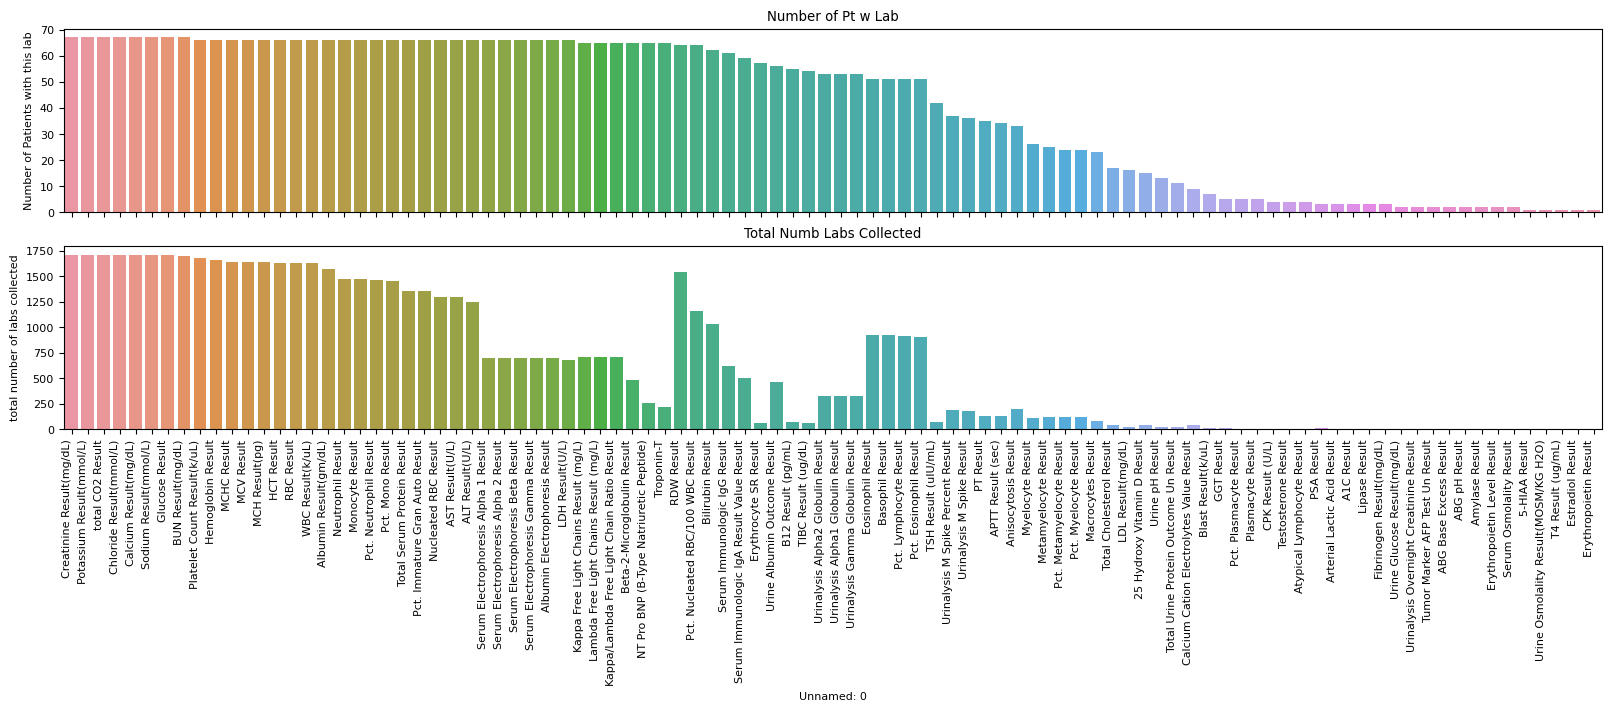

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(16, 7), sharex = True, layout = 'constrained')

#add another subplot that shows the completeness of data for only the labs shown
# ax2 = plt.subplot2grid((4,4), (0,2), rowspan = 3)

#filter df_lab_list_numb_pts to be only the labs graphed 
new_list = []
lab_list = lab_list_import.iloc[:,0]
lab_list_import.index = lab_list_import.iloc[:,0]
# print(lab_list.values.tolist())
for item in list(dict_og_to_trimmed_transformed.keys()):
    # print(item)
    for lab in lab_list:
        if item == lab:
            # print(item + " True")
            new_list.append(item)

masked_df_lab_numb_ptNumber = lab_list_import.loc[new_list]
df_labNumb_ptNumb_filtered_subplots= masked_df_lab_numb_ptNumber.iloc[:,[0,1,2]]
# ax = df_labNumb_ptNumb_filtered_subplots.plot.bar(subplots=True)

plot_numb_pt_wLab= sns.barplot(df_labNumb_ptNumb_filtered_subplots , x = "Unnamed: 0", y = "Number of Patients with this lab", ax= ax[0])
# startIndex = len(ax1.get_yticks())-len(new_list)
# ax2.set_yticks(ax1.get_yticks()[startIndex:])
ax[0].set(xlabel=None)
ax[0].set(xticklabels=[])
ax[0].set(title= "Number of Pt w Lab")
# ax2.yaxis.set_label_position("right")
# startIndex = len(ax1.get_yticks())-len(new_list)
# ax2.set_yticks(ax1.get_yticks()[startIndex:])

# ax[1] = plt.subplot2grid((4,4), (0,3), rowspan = 3)
plot_numb_instances = sns.barplot(df_labNumb_ptNumb_filtered_subplots , x = "Unnamed: 0", y = "total number of labs collected", ax= ax[1])
# ax[1].xaxis.tick_right()
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90, ha = "right")
ax[1].set(title="Total Numb Labs Collected")

fig.savefig("allModels_origFeatures_ptNumb_instances.tif")

## Illustrating data completeness for features selected by a model

copy the binary dataframe.  Then replace row column pairs which are 1 to the number of patients with that original piece of data

# Repeat for the other versions of the data